# Google stock price movement prediction model (for next month)

We would like to model stock prices correctly, so as a stock buyer you can reasonably decide when to buy stocks and when to sell them to make a profit. This is where time series modelling comes in. You need good machine learning models that can look at the history of a sequence of data and correctly predict what the future elements of the sequence are going to be.

**For downloading the dataset, google 'NASDAQ:AAPL' and enter the NASDAQ site. Go to 'Historical Quote' and download the dataset according to time period of you need. Here its for last 4 years. Remove the first row and sort the table ascending wise according to date.**

## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#dataset_train.head()
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1258, 1)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape 

(1198, 60)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [7]:
y_train.shape

(1198,)

## Part 2 - Building the LSTM RNN

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0524
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0044
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0051
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 9s 8ms/step

## Part 3 - Making the predictions and visualising the results

In [17]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [25]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

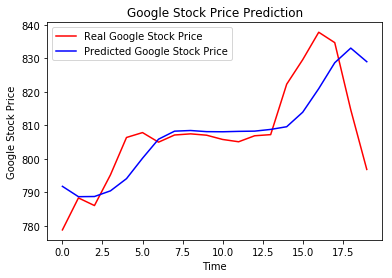

In [26]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()